## Basics
---

Exploring the popular MNIST dataset.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Read in all the data into separate python variables

In [3]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

Let's view few random images and its label. 
* **Step 1**: Import the necessary packages

In [4]:
from PIL import Image, ImageOps
from matplotlib.pyplot import imshow

* **Step 2**: Create a function that takes in a normalized mnist numpy array, scales it up to grayscale and displays it inline

In [5]:
def show_mnist_image(nparray):
    pil_image = Image.fromarray(((nparray.reshape(28,28)) * 256).astype('uint8'), "L")
    # Display the image inline
    %matplotlib inline
    imshow(ImageOps.invert(pil_image), cmap='gray')

* **Step 3**: Select a random image and display its label and the image

Image label: 4


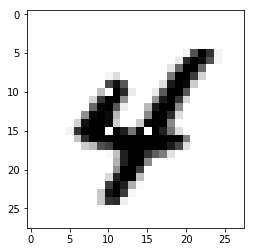

In [6]:
# Pull a random image
random_image_number = 401
random_image = X_train[random_image_number]
random_image_label = Y_train[random_image_number]

# Show the image label and the image
print("Image label: %d"%(random_image_label.argmax()))
show_mnist_image(random_image)

---
## Introduction
---
Explore basic tensorflow datatypes and some basic operations. Explore the use of tensorflow sessions

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create a tensorflow constant
hello = tf.constant("Hello Tensorflow")
# Create a new session
sess = tf.Session()
# Print the constant
print(sess.run(hello))

b'Hello Tensorflow'


In [8]:
# run addition and multiplication operations

a = tf.constant(25, tf.float32)
b = tf.constant(5, tf.float32)

with tf.Session() as sess:
    print("A = %f"%sess.run(a))
    print("B = %f"%sess.run(b))
    print("A + B = %f"%sess.run(a+b))
    print("A * B = %f"%sess.run(a*b))
    print("A / B = %f"%sess.run(a/b))
    print("A + B using tf add = %f"%sess.run(tf.add(a, b)))
    print("A * B using tf multiply = %f"%sess.run(tf.multiply(a, b)))

A = 25.000000
B = 5.000000
A + B = 30.000000
A * B = 125.000000
A / B = 5.000000
A + B using tf add = 30.000000
A * B using tf multiply = 125.000000


> *For placeholders, an optional argument `shape` can be used to make sure the input dimensions matches the required tensor dimensions. *

> *If this is missing or `None` (default), then the placeholder can accept any shape.*

In [9]:
# Run addition and multiplication with placeholders

c = tf.placeholder(tf.float32, shape=())
d = tf.placeholder(tf.float32, shape=())

sum = tf.add(c, d)
prod = tf.multiply(c, d)

with tf.Session() as sess:
    
    print("Operations by feeding values")
    print("C = %f"%sess.run(c, feed_dict={c: 4}))
    print("D = %f"%sess.run(d, feed_dict={d: 6}))
    print("Sum = %f"%sess.run(sum, feed_dict={c: 4, d: 6}))
    print("Prod = %f"%sess.run(prod, feed_dict={c: 4, d: 6}))

Operations by feeding values
C = 4.000000
D = 6.000000
Sum = 10.000000
Prod = 24.000000


In [10]:
# Matrix operations with placeholders

mat1 = tf.placeholder(tf.float32, shape=(2,2))
mat2 = tf.placeholder(tf.float32, shape=(2,1))

matmul = tf.matmul(mat1, mat2)

with tf.Session() as sess:
    print("Matrix multiplication using python lists as feed dict values")
    print(sess.run(matmul, feed_dict={ mat1: [[1,2],[2,1]], mat2: [[1],[2]]}))
    print("Matrix multiplication using numpyarrays as feed dict values")
    print(sess.run(matmul, feed_dict={ mat1: np.array([[1,2],[2,1]]), mat2: np.array([[1],[2]])}))

Matrix multiplication using python lists as feed dict values
[[ 5.]
 [ 4.]]
Matrix multiplication using numpyarrays as feed dict values
[[ 5.]
 [ 4.]]


---
## Basic Models
---

#### Nearest Neighbors